In [3]:
import sys
print(sys.executable)

c:\Users\Beeclick\Documents\MIAAD\S3\Data Mining\Project\data-mining-project\DataMiningEnv\Scripts\python.exe


### Import des bibliothèques

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Chargement des données brutes

In [5]:
immatriculations = pd.read_csv("../data/raw/immatriculations_small.csv")

### Nettoyage des données

In [6]:
# Affichage des premières lignes
print("Aperçu des données brutes:")
immatriculations.head()

Aperçu des données brutes:


,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3467 SB 72,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880
1,113 LY 42,Renault,Vel Satis 3.5 V6,245,très longue,5,5,noir,False,49200
2,925 WK 87,Jaguar,X-Type 2.5 V6,197,longue,5,5,blanc,False,37100
3,3279 RV 81,Renault,Laguna 2.0T,170,longue,5,5,gris,False,27300
4,82 RZ 54,Fiat,Croma 2.2,147,longue,5,5,bleu,False,24780


In [7]:
# Vérification des types de données 
print("\nInformations sur les données:")
immatriculations.info()


Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   immatriculation  99989 non-null  object
 1   marque           99989 non-null  object
 2   nom              99989 non-null  object
 3   puissance        99989 non-null  int64 
 4   longueur         99989 non-null  object
 5   nbPlaces         99989 non-null  int64 
 6   nbPortes         99989 non-null  int64 
 7   couleur          99989 non-null  object
 8   occasion         99989 non-null  bool  
 9   prix             99989 non-null  int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 7.0+ MB


In [8]:
# Vérification des valeurs manquantes
print("\nValeurs manquantes par colonne:")
immatriculations.isnull().sum()


Valeurs manquantes par colonne:


immatriculation    0
marque             0
nom                0
puissance          0
longueur           0
nbPlaces           0
nbPortes           0
couleur            0
occasion           0
prix               0
dtype: int64

In [9]:
# Compter les occurrences pour chaque colonne de type 'object'
for col in immatriculations.columns:
    if immatriculations[col].dtype == 'object':
        print(immatriculations[col].value_counts())
        print()

immatriculation
4656 EJ 74    1
3467 SB 72    1
113 LY 42     1
925 WK 87     1
3279 RV 81    1
             ..
9896 TW 50    1
6484 MS 45    1
3696 JS 92    1
9339 BW 87    1
8290 SD 41    1
Name: count, Length: 99989, dtype: int64

marque
Audi          14668
BMW           14529
Renault       12449
Jaguar         9418
Volkswagen     7867
Mercedes       7541
Volvo          6369
Peugeot        4852
Saab           4282
Fiat           3796
Ford           3767
Nissan         3378
Skoda          1634
Kia            1154
Daihatsu       1097
Seat           1094
Mini            811
Dacia           696
Lancia          587
Name: count, dtype: int64

nom
A2 1.4              14268
M5                  12660
X-Type 2.5 V6        9418
S80 T6               6369
Vel Satis 3.5 V6     6101
S500                 5256
Polo 1.2 6V          4883
1007 1.4             4852
9.3 1.8T             4282
Croma 2.2            3796
Laguna 2.0T          3786
Mondeo 1.8           3767
Golf 2.0 FSI         2634
Megane 2.0

In [10]:
# Recherche des doublons
duplicates = immatriculations.duplicated().sum()
print(f"\nNombre de doublons : {duplicates}")


Nombre de doublons : 0


In [11]:
immatriculations.describe(include='object')

,immatriculation,marque,nom,longueur,couleur
count,99989,99989,99989,99989,99989
unique,99989,19,28,4,5
top,4656 EJ 74,Audi,A2 1.4,très longue,bleu
freq,1,14668,14268,33667,20085


In [12]:
immatriculations.describe(include='boolean')

,occasion
count,99989
unique,2
top,False
freq,68638


In [13]:
immatriculations.describe()

,puissance,nbPlaces,nbPortes,prix
count,99989.000000,99989.0,99989.000000,99989.000000
mean,198.561272,5.0,4.868646,35730.097251
std,136.715032,0.0,0.495437,25769.478289
min,55.000000,5.0,3.000000,7500.000000
25%,75.000000,5.0,5.000000,18310.000000
50%,150.000000,5.0,5.000000,25970.000000
75%,245.000000,5.0,5.000000,49200.000000
max,507.000000,5.0,5.000000,101300.000000


### Visualisation des données

C:\Users\Beeclick\AppData\Local\Temp\ipykernel_25140\83267893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='marque', y='puissance', data=immatriculations,palette="viridis")


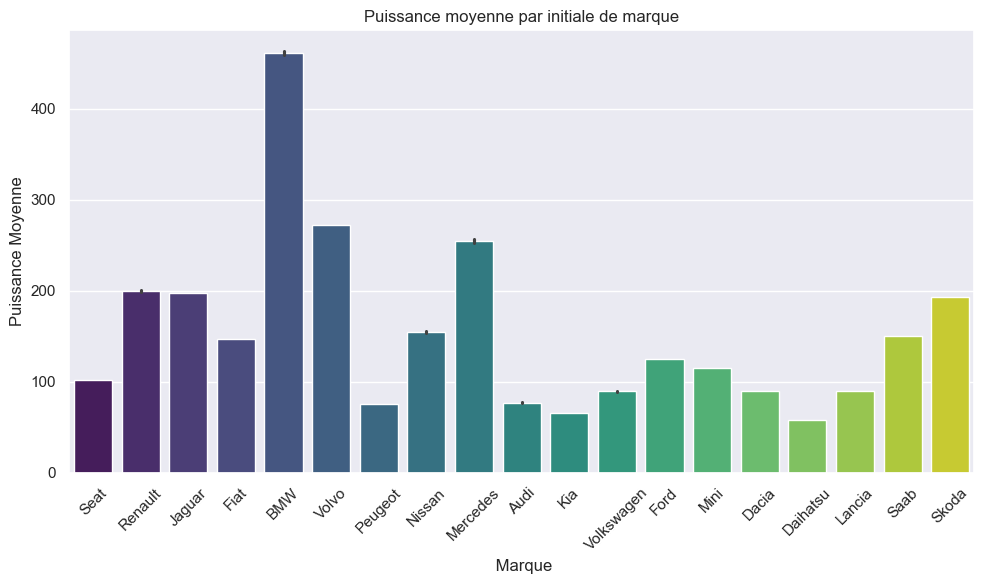

In [14]:
# Analyse des variables catégoriques
if 'marque' in immatriculations.columns and 'puissance' in immatriculations.columns:
    # Plot the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='marque', y='puissance', data=immatriculations,palette="viridis")
    plt.title('Puissance moyenne par initiale de marque')
    plt.xlabel(' Marque')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

C:\Users\Beeclick\AppData\Local\Temp\ipykernel_25140\4067100707.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='nom', y='puissance', data=immatriculations,palette="viridis")


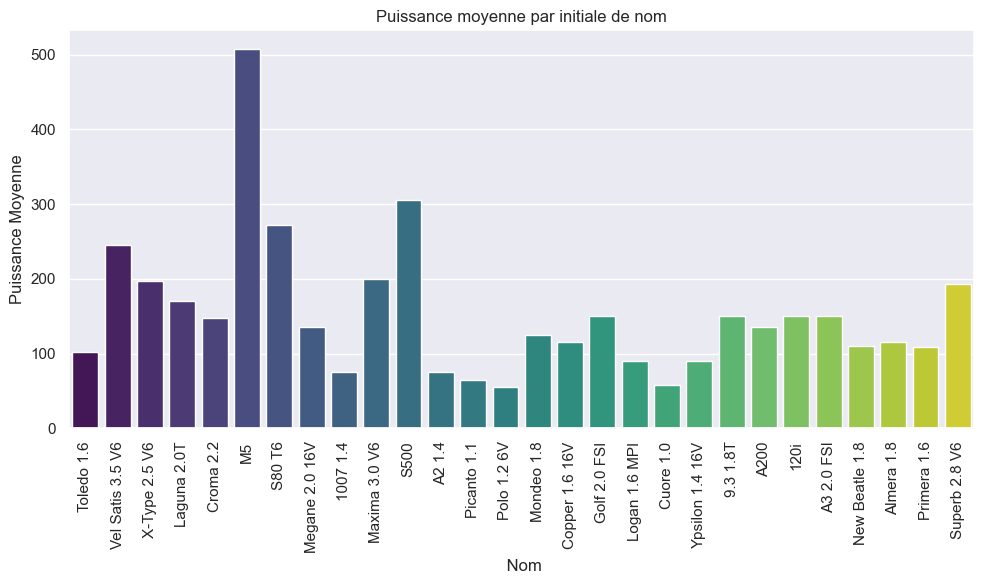

In [15]:
# Analyse des variables catégoriques
if 'nom' in immatriculations.columns and 'puissance' in immatriculations.columns:
    # Plot the barplot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='nom', y='puissance', data=immatriculations,palette="viridis")
    plt.title('Puissance moyenne par initiale de nom')
    plt.xlabel(' Nom')
    plt.ylabel('Puissance Moyenne')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

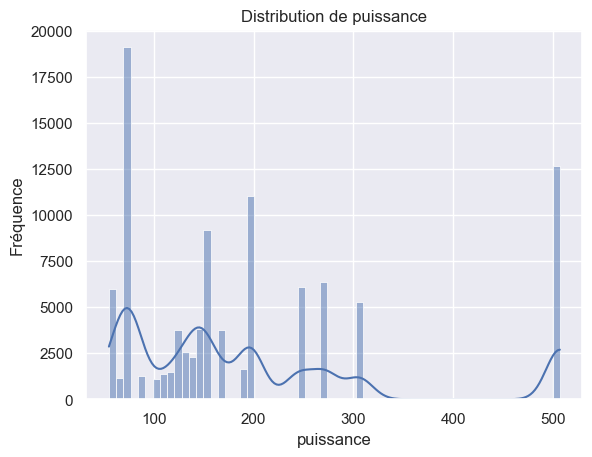

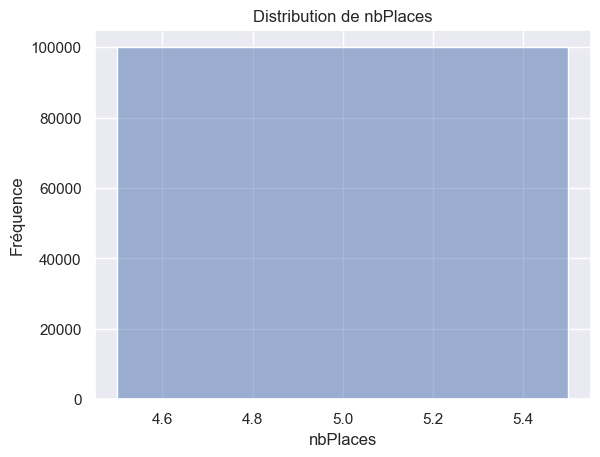

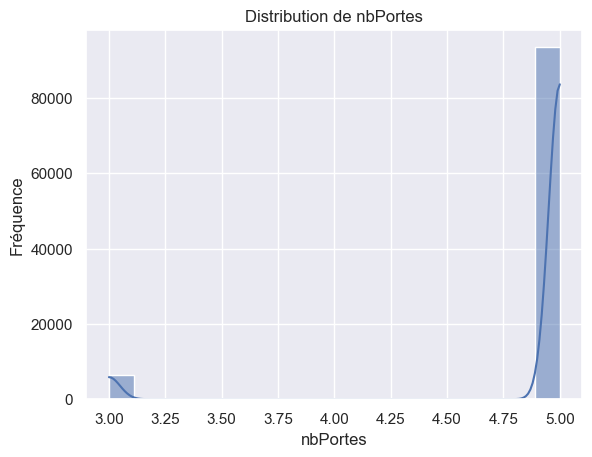

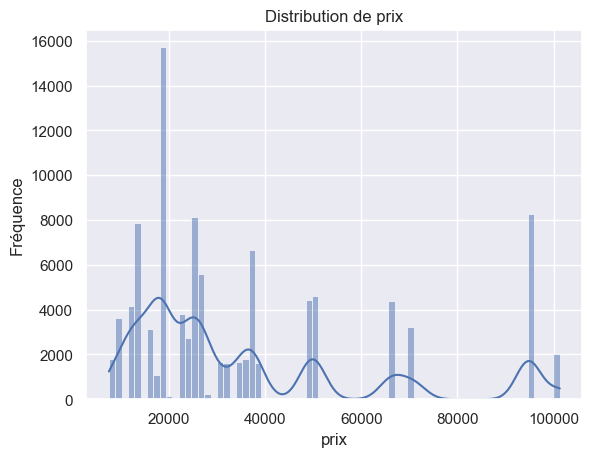

In [16]:
# Histogrammes pour les variables numériques
num_cols = immatriculations.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    plt.figure()
    sns.histplot(immatriculations[col], kde=True)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.show()

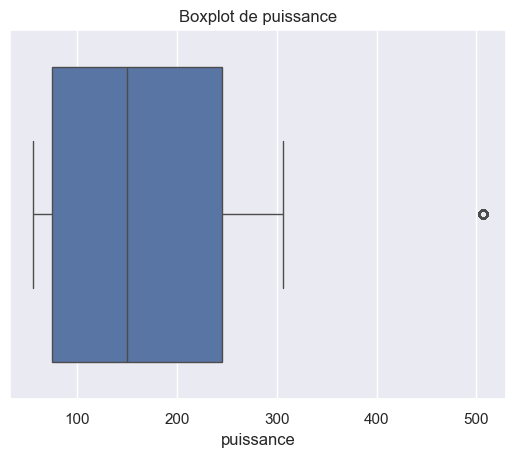

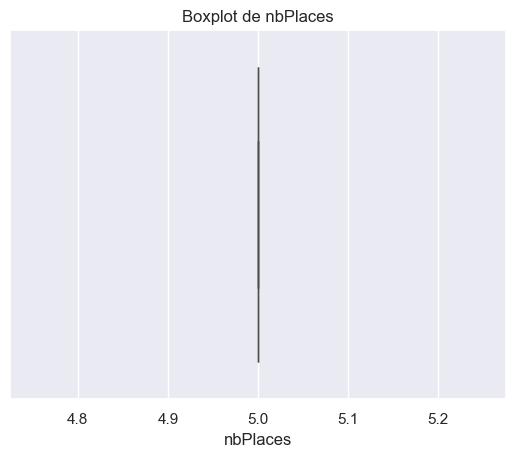

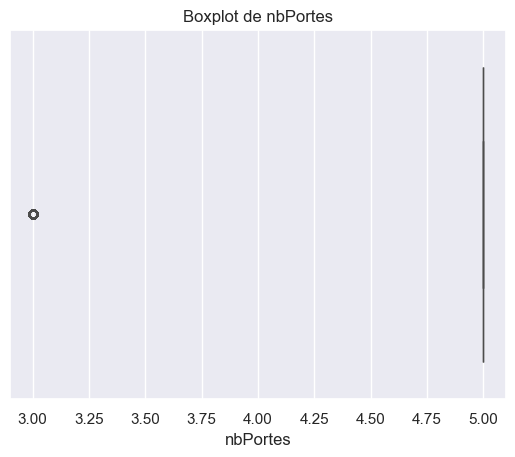

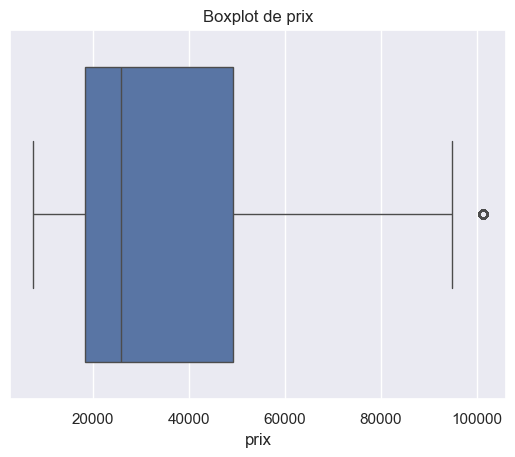

In [17]:
# Boxplots pour détecter les outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=immatriculations[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

In [18]:
catalogue = pd.read_csv("../data/processed/catalogue_processed.csv")

In [22]:
# Le nombre de places est toujours de 5 dans les immatriculations, mais dans le catalogue, il varie entre 5 et 7. 
# Ainsi, nous validons les informations concernant le nombre de places entre le catalogue et les immatriculations.

In [25]:
# Filtrer les lignes dans le catalogue où nbPlaces == 7
filtered_catalogue = catalogue[catalogue['nbPlaces'] == 7]

# Afficher uniquement les colonnes marque, nom et nbPlaces
filtered_catalogue[['marque', 'nom', 'nbPlaces']].head()

,marque,nom,nbPlaces
10,Volkswagen,Touran 2.0 FSI,7
11,Volkswagen,Touran 2.0 FSI,7
12,Volkswagen,Touran 2.0 FSI,7
13,Volkswagen,Touran 2.0 FSI,7
14,Volkswagen,Touran 2.0 FSI,7


In [28]:
# Groupement par 'nom' et affichage des valeurs uniques de 'nbPlaces' pour chaque groupe
grouped_catalogue = filtered_catalogue.groupby('nom')['nbPlaces'].unique()

# Afficher les résultats
grouped_catalogue.head()


nom
Espace 2.0T       [7]
FR-V 1.7          [7]
Matrix 1.6        [7]
Touran 2.0 FSI    [7]
Name: nbPlaces, dtype: object

In [29]:
# On suppose que filtered_catalogue contient les noms avec nbPlaces == 7
# On parcourt chaque modèle et marque de filtered_catalogue pour voir s'il existe dans immatriculations

for nom in grouped_catalogue.index:
    # Recherche dans immatriculations pour chaque 'nom' et 'nbPlaces' égal à 7
    filtered_immatriculations = immatriculations[(immatriculations['nom'] == nom) & (immatriculations['nbPlaces'] == 7)]
    
    # Afficher les résultats si des immatriculations existent pour ce modèle
    if not filtered_immatriculations.empty:
        print(f"Le modèle '{nom}' avec {7} places existe dans les immatriculations.")
    else:
        print(f"Le modèle '{nom}' avec {7} places n'existe pas dans les immatriculations.")


Le modèle 'Espace 2.0T' avec 7 places n'existe pas dans les immatriculations.
Le modèle 'FR-V 1.7' avec 7 places n'existe pas dans les immatriculations.
Le modèle 'Matrix 1.6' avec 7 places n'existe pas dans les immatriculations.
Le modèle 'Touran 2.0 FSI' avec 7 places n'existe pas dans les immatriculations.


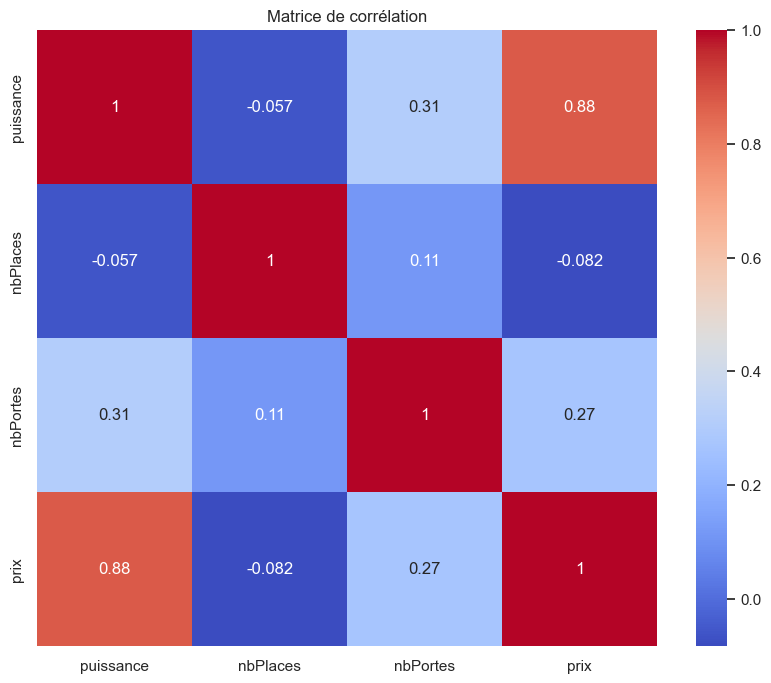

In [30]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(catalogue[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [31]:
# J'utilise le dataframe immatriculations
immatriculations.to_csv('../data/processed/immatriculations_processed.csv', index=False)
print("\nDonnées nettoyées sauvegardées dans 'immatriculations_processed.csv'")


Données nettoyées sauvegardées dans 'immatriculations_processed.csv'
